In [72]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

# 해당 path에 원본 사진 옮겨놓고 시작
path = r'./images/original/3/'
save_path = r'./images/changed/'
# for i in os.listdir(path):
#     print(i)

TypeError: Image data of dtype object cannot be converted to float

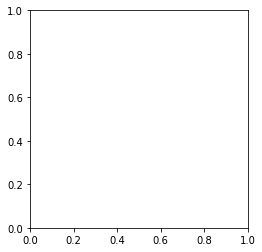

In [79]:
# 이미지 로드 및 그레이 이미지로 변경
i = '5.jpg'   
image = cv2.imread(path+i)
plt.imshow(image)

In [74]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


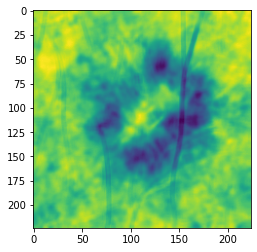

In [67]:
# 이미지 노이즈 제거
kernel1 = np.ones((5,5),np.float32)/25
dst1 = cv2.filter2D(gray,-1,kernel1)

plt.imshow( dst1)

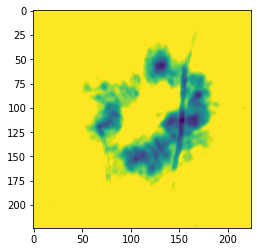

In [68]:
#  threshold 이미지 필터 생성
ret2, th2 = cv2.threshold(dst1, 45, 255,  cv2.THRESH_TRUNC+cv2.THRESH_OTSU) # cv2.THRESH_BINARY+cv2.THRESH_OTSU

plt.imshow( th2)

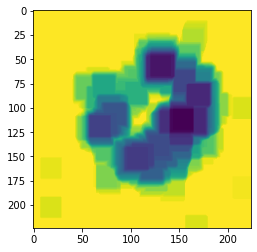

In [69]:
# 불규칙한 모양과 노이즈 제거
kernel3 = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(th2, kernel3, iterations=5)
plt.imshow(img_erosion)

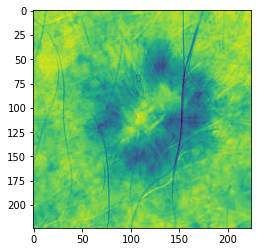

In [70]:
# 관심 영역에 대한 확장
img_dilation = cv2.dilate(img_erosion, kernel3, iterations=5)

contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) != 0:
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    new_img = gray[y:y+h,x:x+w]
plt.imshow(new_img)

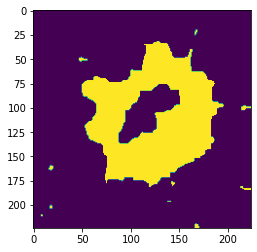

In [77]:
median_filter = cv2.medianBlur(new_img, 5)

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
erosion = cv2.morphologyEx(median_filter, cv2.MORPH_ERODE, kernel)
dilation = cv2.morphologyEx(erosion, cv2.MORPH_DILATE, kernel)

ret3,th3 = cv2.threshold(dilation,180,255,cv2.THRESH_BINARY)
th3 = cv2.bitwise_not(th3)
plt.imshow( th3)

In [60]:
contours,hierarchy = cv2.findContours(th3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

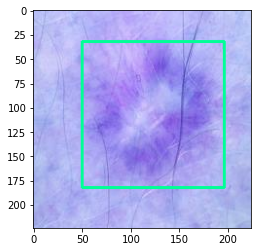

In [61]:
if len(contours) != 0:
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    cancer = image[y:y+h,x:x+w]

    new_img = cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,150), 2)

plt.imshow( new_img)

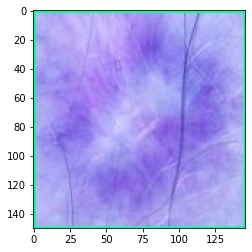

In [62]:
plt.imshow(cancer)

In [63]:
cv2.imwrite(save_path+i,new_img )

True

In [13]:
import cv2
import sys
import numpy as np